#TITANIC SURVIVAL PREDICTION

Use the Titanic dataset to build a model that predicts whether a
passenger on the Titanic survived or not. This is a classic beginner
project with readily available data.
The dataset typically used for this project contains information
about individual passengers, such as their age, gender, ticket
class, fare, cabin, and whether or not they survived.

## ***Import Libraries***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV , train_test_split
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn.preprocessing import LabelEncoder , MinMaxScaler
import mplcyberpunk
plt.style.use('cyberpunk')


## ***Exploring Dataset***

In [ ]:
data = pd.read_csv('Titanic-Dataset.csv')

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 891 entries, 0 to 890

Data columns (total 12 columns):

 #   Column       Non-Null Count  Dtype  

---  ------       --------------  -----  

 0   PassengerId  891 non-null    int64  

 1   Survived     891 non-null    int64  

 2   Pclass       891 non-null    int64  

 3   Name         891 non-null    object 

 4   Sex          891 non-null    object 

 5   Age          714 non-null    float64

 6   SibSp        891 non-null    int64  

 7   Parch        891 non-null    int64  

 8   Ticket       891 non-null    object 

 9   Fare         891 non-null    float64

 10  Cabin        204 non-null    object 

 11  Embarked     889 non-null    object 

dtypes: float64(2), int64(5), object(5)

memory usage: 83.7+ KB


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


## ***Check Missing Values***

<Axes: >

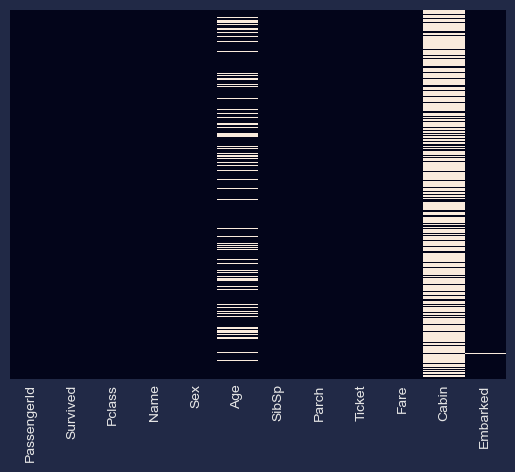

In [ ]:
sns.heatmap(data.isna(),yticklabels=False ,cbar=False)

In [ ]:
data.isna().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [ ]:
data['Age'].fillna(data['Age'].mean(),inplace=True)

In [ ]:
data.drop('Cabin' , inplace = True ,axis=1)

In [ ]:
data['Embarked'] = data['Embarked'].fillna('S')

In [ ]:
data.isna().sum().sort_values(ascending=False)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.shape

(891, 11)

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## ***Handling Categorical Features***

In [ ]:
Sex = pd.get_dummies(data['Sex'],drop_first=True)

In [ ]:
Embarked = pd.get_dummies(data['Embarked'],drop_first=True)

In [ ]:
data.drop(['Sex' , 'Embarked','Name','Ticket'],axis=1,inplace=True)

In [ ]:
data = pd.concat([data,Sex,Embarked],axis=1)

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


## ***Visualizing Dataset After Cleaning***

<Axes: xlabel='Survived', ylabel='count'>

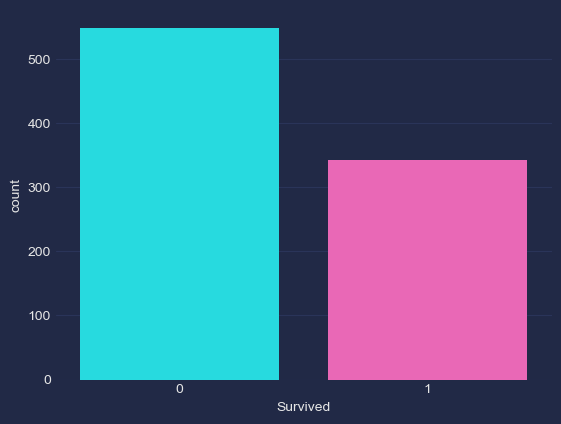

In [ ]:
sns.countplot(x = 'Survived' , data=data)

<Axes: xlabel='Survived', ylabel='count'>

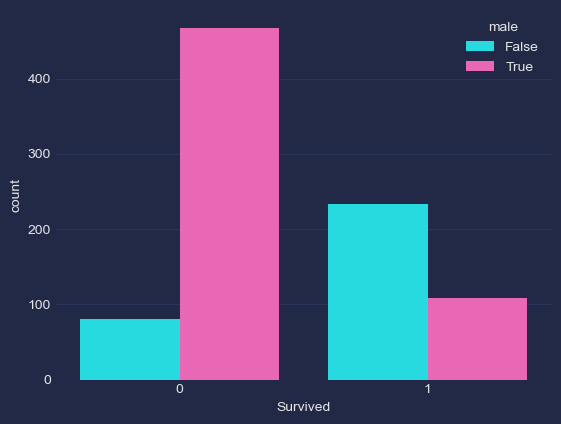

In [ ]:
sns.countplot(x = 'Survived' , data=data ,hue='male')

<Axes: xlabel='Survived', ylabel='count'>

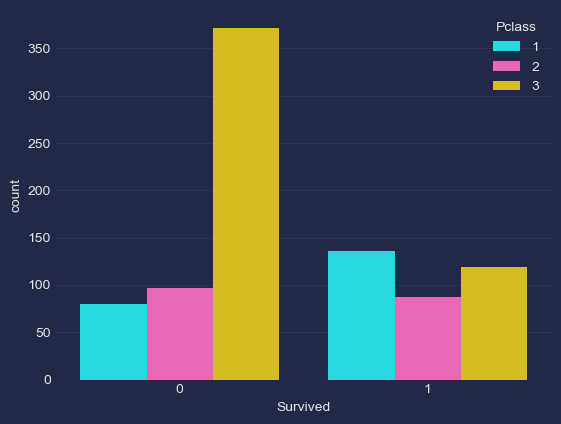

In [ ]:
sns.countplot(x = 'Survived' , data=data ,hue='Pclass')

<Axes: >

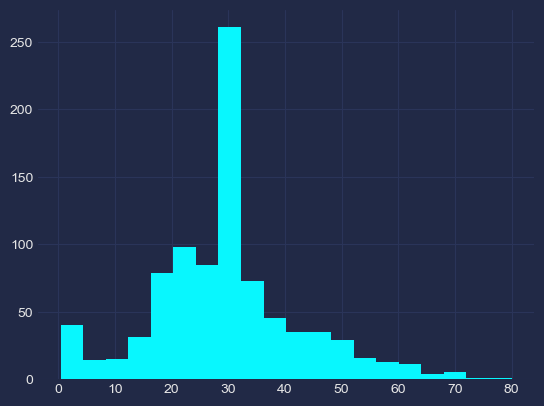

In [ ]:
data['Age'].hist(bins=20)

<Axes: >

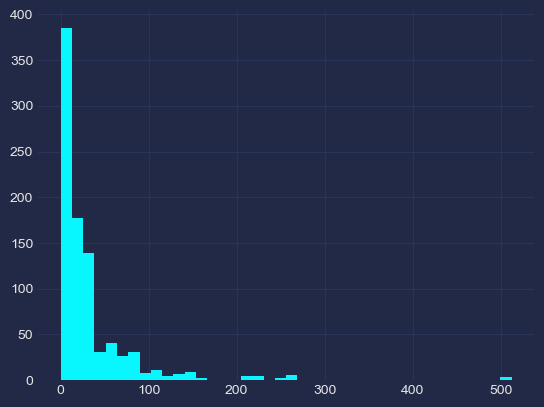

In [ ]:
data['Fare'].hist(bins=40)

<Axes: ylabel='Fare'>

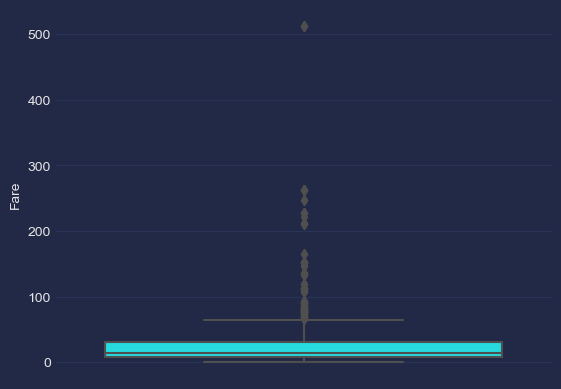

In [ ]:
sns.boxplot(y='Fare',data=data)

## ***PreProcessing***

In [ ]:
le = LabelEncoder()
data['male'] = le.fit_transform(data['male'])
data['Q'] = le.fit_transform(data['Q'])
data['S'] = le.fit_transform(data['S'])


In [ ]:
sc = MinMaxScaler()
data['Fare'] = sc.fit_transform(data['Fare'].values.reshape(-1, 1))

Text(0, 0.5, 'Frequency')

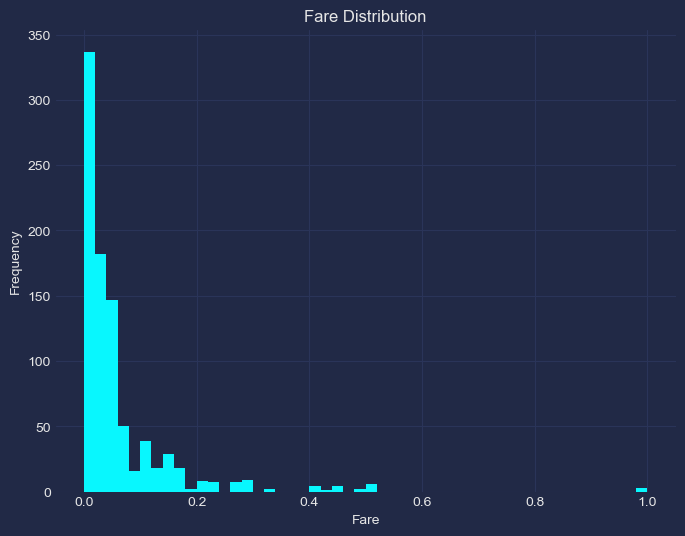

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(data['Fare'], bins = 50)
plt.title("Fare Distribution")
plt.xlabel('Fare')
plt.ylabel('Frequency')

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,0.014151,1,0,1
1,2,1,1,38.0,1,0,0.139136,0,0,0
2,3,1,3,26.0,0,0,0.015469,0,0,1
3,4,1,1,35.0,1,0,0.103644,0,0,1
4,5,0,3,35.0,0,0,0.015713,1,0,1


## ***Build Models***

In [ ]:
x = data.drop((['Survived' , 'PassengerId']) , axis = 1)
y = data['Survived']

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 ,random_state=42)

In [ ]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((712, 8), (179, 8), (712,), (179,))

## ***Logistic Regression With GridSearchCV***

In [ ]:
lr = LogisticRegression(random_state=42)
param_grid_lr = {
    'C' : [100,10,1.0,0.1,0.01],
    'penalty':['l1','l2']
}

lr_grid_model = GridSearchCV(lr,param_grid=param_grid_lr , scoring='accuracy' , cv= 5)
lr_grid_model.fit(x_train,y_train)
print("Best Parameters: ", lr_grid_model.best_params_)
Best_Logistic_Regression_Model = lr_grid_model.best_estimator_



In [ ]:
print("Accuracy on Training Set: {:.2f}".format(lr_grid_model.best_score_ * 100))

Accuracy on Training Set: 79.07


In [ ]:
LR_Grid_Score = Best_Logistic_Regression_Model.score(x_test, y_test)
print("Accuracy By Best Logistic Regression Model:",LR_Grid_Score*100)

Accuracy By Best Logistic Regression Model: 81.00558659217877


Text(0.5, 1.0, 'Confusion Matrix For Best Logistic Regression')

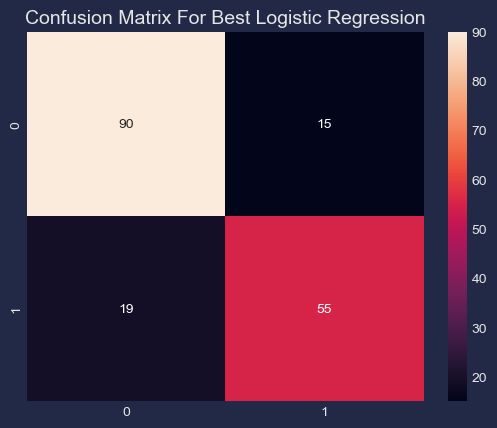

In [ ]:
lr_grid_y_pred = Best_Logistic_Regression_Model.predict(x_test)
conf_matrix = confusion_matrix(y_test, lr_grid_y_pred)
sns.heatmap(conf_matrix, annot=True)
plt.title("Confusion Matrix For Best Logistic Regression", fontsize=14)

## ***RandomForest With GridSearchCV***

In [ ]:
rf = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [10, 100,1000],
    'max_depth': [15,20,40,80,90],
    'max_features' :[0.5,1,2,3],
    'min_samples_split': [8, 10,12],
    'min_samples_leaf': [ 5,10,15],
    'criterion' : ['gini', 'entropy'],
    'bootstrap': [True]

}

rf_grid_model = GridSearchCV(rf,param_grid=param_grid_rf , cv= 3,n_jobs=-1,verbose=1)
rf_grid_model.fit(x_train,y_train)
print("Best Parameters: ", rf_grid_model.best_params_)
Best_RandomForest_Model = rf_grid_model.best_estimator_



Fitting 3 folds for each of 1080 candidates, totalling 3240 fits

Best Parameters:  {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 15, 'max_features': 2, 'min_samples_leaf': 5, 'min_samples_split': 8, 'n_estimators': 10}


In [ ]:
print("Accuracy on Training Set: {:.2f}".format(rf_grid_model.best_score_ * 100))

Accuracy on Training Set: 83.15


In [ ]:
RF_Grid_Score = Best_RandomForest_Model.score(x_test, y_test)
print("Accuracy By Best RandomForest Model:",RF_Grid_Score*100)

Accuracy By Best RandomForest Model: 81.56424581005587


Text(0.5, 1.0, 'Confusion Matrix For Best RandomForest')

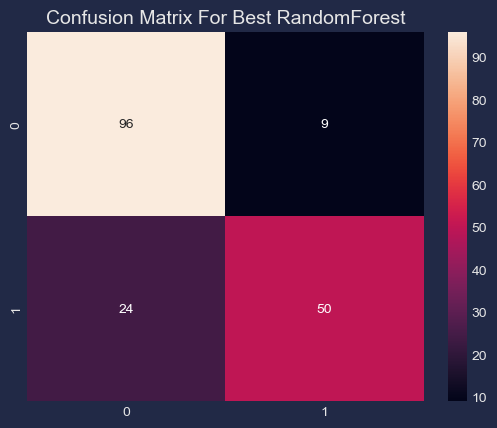

In [ ]:
rf_grid_y_pred = Best_RandomForest_Model.predict(x_test)
conf_matrix = confusion_matrix(y_test, rf_grid_y_pred)
sns.heatmap(conf_matrix, annot=True)
plt.title("Confusion Matrix For Best RandomForest", fontsize=14)

In [ ]:
decision_tree_model = DecisionTreeClassifier(max_depth=10 ,criterion='gini',min_samples_split=4,min_samples_leaf=4,max_features=None,random_state=42)
decision_tree_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=4,
                       random_state=42)

In [ ]:
y_train_pred_dt = decision_tree_model.predict(x_train)
accuracy_train_dt = accuracy_score(y_train, y_train_pred_dt)
print("Accuracy on Training Set: {:.2f}".format(accuracy_train_dt* 100))

Accuracy on Training Set: 88.48


In [ ]:
DT_Score = decision_tree_model.score(x_test, y_test)
print("Accuracy By Decision Tree Model:",DT_Score*100)

Accuracy By Decision Tree Model: 84.91620111731844


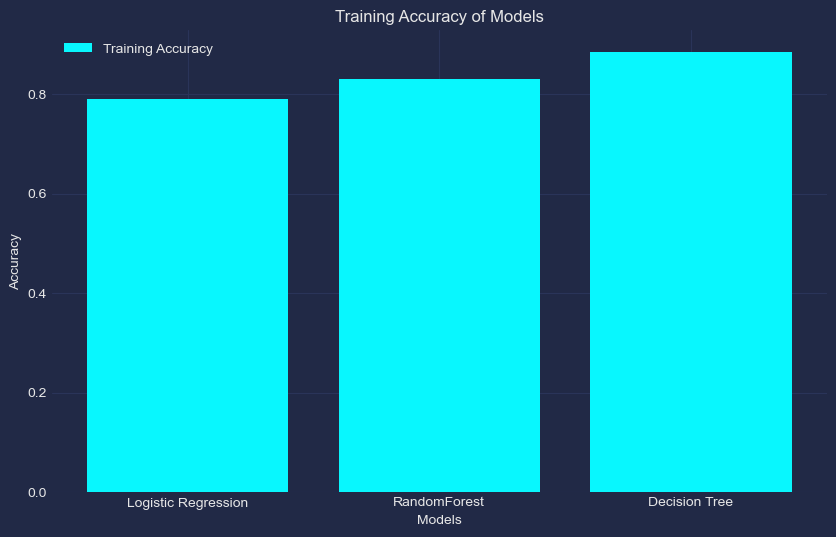

In [ ]:
model_names = ['Logistic Regression', 'RandomForest','Decision Tree']
train_accuracies = [lr_grid_model.best_score_,rf_grid_model.best_score_,accuracy_train_dt]
plt.figure(figsize=(10, 6))
plt.bar(model_names, train_accuracies, label='Training Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Training Accuracy of Models')
plt.legend()
plt.show()


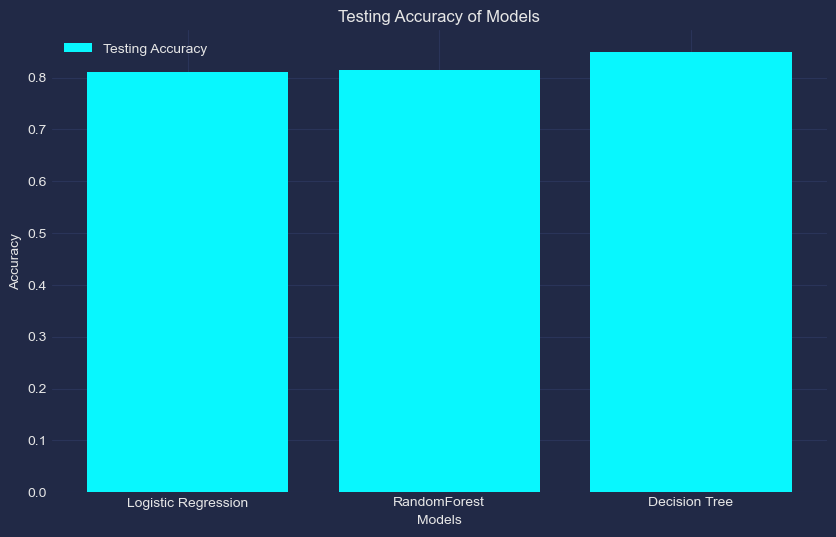

In [ ]:
plt.figure(figsize=(10, 6))
test_accuracies = [LR_Grid_Score, RF_Grid_Score,DT_Score]
plt.bar(model_names, test_accuracies, label='Testing Accuracy')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Testing Accuracy of Models')
plt.legend()

plt.show()